In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset1 = pd.read_csv("userStat0.csv", sep=';')
dataset2 = pd.read_csv("userStat1.csv", sep=";")
dataset3 = pd.read_csv("userStat2.csv", sep=";")

In [3]:
dataset2 = dataset2.iloc[:10000]

In [4]:
dataset3 = dataset3.iloc[:10000]

In [16]:
dataset = pd.concat([dataset1,dataset2,dataset3[50:]]).reset_index().drop("index", axis=1)

In [17]:
test_dataset = dataset3.iloc[:50]

In [18]:
from sklearn.preprocessing import normalize
dataset_scaled = normalize(dataset)

In [19]:
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns)

In [20]:
dataset_scaled

,Electrical,Sport,VehicleAndParts,BeautyCare,Cultural,Home,Gathering
0,0.023643,0.095886,0.000000,0.000000,0.984788,0.140769,0.024958
1,0.015628,0.000000,0.049384,0.000000,0.000000,0.003348,0.998652
2,0.511778,0.000000,0.404537,0.092708,0.059004,0.749904,0.000000
3,0.000000,0.000000,0.005547,0.000000,0.000000,0.211638,0.977332
4,0.000000,0.011780,0.000000,0.000000,0.999931,0.000000,0.000000
5,0.000000,0.983116,0.003993,0.002943,0.006095,0.182814,0.000000
6,0.000000,0.948497,0.002574,0.287152,0.000000,0.003347,0.133716
7,0.005409,0.000000,0.072062,0.996283,0.046329,0.002808,0.006553
8,0.993944,0.000000,0.109889,0.000000,0.000000,0.000000,0.000000
9,0.163233,0.000000,0.157145,0.002883,0.282879,0.006227,0.931983


In [21]:
test_dataset_scaled = normalize(test_dataset)
test_dataset_scaled = pd.DataFrame(test_dataset_scaled, columns=test_dataset.columns)

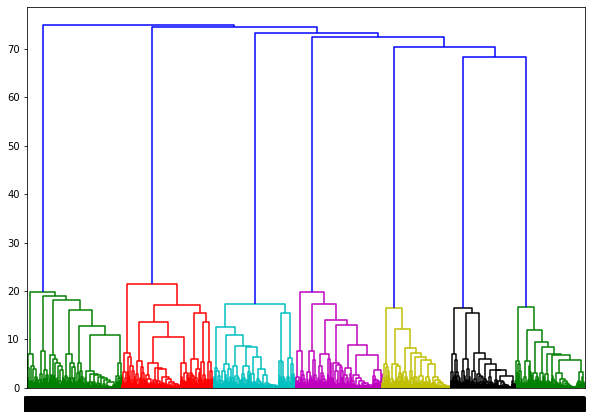

In [22]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(dataset_scaled, method='ward'))

In [22]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward',connectivity=kneighbors_graph(dataset_scaled, n_neighbors=200))
cluster.fit_predict(dataset_scaled)

array([3, 4, 0, ..., 2, 4, 4], dtype=int64)

In [10]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=7, n_init=20, max_iter=200, init_params='random')
gm.fit(dataset_scaled)

GaussianMixture(covariance_type='full', init_params='random', max_iter=200,
                means_init=None, n_components=7, n_init=20,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [15]:
np.round(gm.predict_proba(dataset_scaled)[:10],2)

array([[1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.56, 0.  , 0.  , 0.44],
       [0.58, 0.  , 0.  , 0.  , 0.  , 0.  , 0.42],
       [0.  , 0.  , 0.  , 0.  , 0.95, 0.  , 0.05],
       [0.  , 0.91, 0.  , 0.  , 0.08, 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.38, 0.62, 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ]])

In [13]:
dataset[:10]

,Electrical,Sport,VehicleAndParts,BeautyCare,Cultural,Home,Gathering
0,12.40,50.29,0.00,0.00,516.50,73.83,13.09
1,10.69,0.00,33.78,0.00,0.00,2.29,683.10
2,123.60,0.00,97.70,22.39,14.25,181.11,0.00
3,0.00,0.00,1.25,0.00,0.00,47.69,220.23
4,0.00,7.50,0.00,0.00,636.62,0.00,0.00
5,0.00,467.75,1.90,1.40,2.90,86.98,0.00
6,0.00,368.43,1.00,111.54,0.00,1.30,51.94
7,2.60,0.00,34.64,478.91,22.27,1.35,3.15
8,211.02,0.00,23.33,0.00,0.00,0.00,0.00
9,70.78,0.00,68.14,1.25,122.66,2.70,404.12


In [75]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(n_jobs=-1, eps=0.05, min_samples=1000, co)
dbsc.fit_predict(dataset_scaled)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [23]:
cluster.labels_[:10]

array([3, 4, 0, 4, 3, 6, 6, 5, 0, 4], dtype=int64)

In [24]:
dataset.head(10)

,Electrical,Sport,VehicleAndParts,BeautyCare,Cultural,Home,Gathering
0,12.40,50.29,0.00,0.00,516.50,73.83,13.09
1,10.69,0.00,33.78,0.00,0.00,2.29,683.10
2,123.60,0.00,97.70,22.39,14.25,181.11,0.00
3,0.00,0.00,1.25,0.00,0.00,47.69,220.23
4,0.00,7.50,0.00,0.00,636.62,0.00,0.00
5,0.00,467.75,1.90,1.40,2.90,86.98,0.00
6,0.00,368.43,1.00,111.54,0.00,1.30,51.94
7,2.60,0.00,34.64,478.91,22.27,1.35,3.15
8,211.02,0.00,23.33,0.00,0.00,0.00,0.00
9,70.78,0.00,68.14,1.25,122.66,2.70,404.12


In [113]:
dataset["cluster"] = cluster.labels_

In [20]:
import matplotlib.pyplot as plt

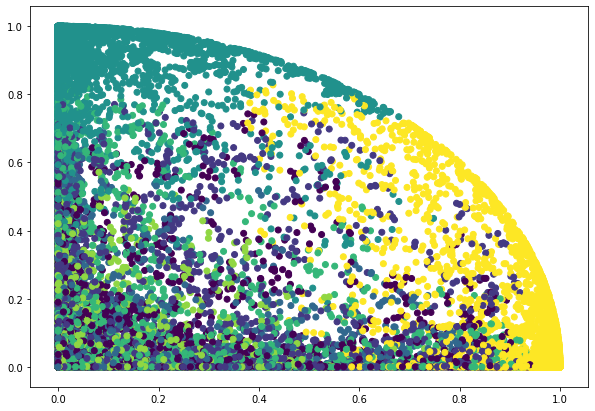

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(dataset_scaled.iloc[:,2], dataset_scaled.iloc[:,3], c=cluster.labels_)

#dataset_scaled['Gathering'],
#dataset_scaled['Cultural'],
#dataset_scaled['VehicleAndParts'],
#dataset_scaled['BeautyCare'],
#dataset_scaled['Cultural'],
#dataset_scaled['Home'],
#dataset_scaled['Gathering']

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X3D = pca.fit_transform(dataset_scaled)

c:\python37-64\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


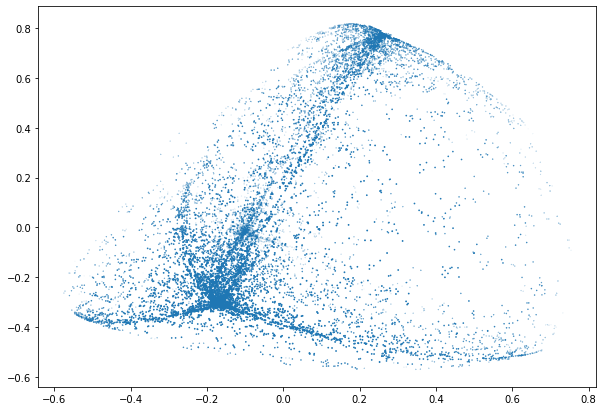

In [35]:
plt.figure(figsize=(10, 7))
plt.scatter(X3D[:,0], X3D[:,1], X3D[:,2])

In [36]:
pca.explained_variance_ratio_

array([0.16775227, 0.16698427, 0.16495877])

In [95]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=7, n_init=20, init_params='random', max_iter=200)
bgm.fit_predict(dataset_scaled)

array([4, 2, 1, ..., 1, 5, 2], dtype=int64)

In [96]:
bgm.predict(dataset_scaled)[:10]

array([4, 2, 1, 4, 0, 3, 1, 5, 3, 1], dtype=int64)

In [99]:
np.round(bgm.weights_,2)

array([0.11, 0.23, 0.1 , 0.16, 0.14, 0.15, 0.11])

In [100]:
np.round(bgm.predict(dataset_scaled)[:10],2)

array([4, 2, 1, 4, 0, 3, 1, 5, 3, 1], dtype=int64)

In [91]:
dataset.head(10)

,Electrical,Sport,VehicleAndParts,BeautyCare,Cultural,Home,Gathering,cluster
0,12.40,50.29,0.00,0.00,516.50,73.83,13.09,3
1,10.69,0.00,33.78,0.00,0.00,2.29,683.10,4
2,123.60,0.00,97.70,22.39,14.25,181.11,0.00,0
3,0.00,0.00,1.25,0.00,0.00,47.69,220.23,4
4,0.00,7.50,0.00,0.00,636.62,0.00,0.00,3
5,0.00,467.75,1.90,1.40,2.90,86.98,0.00,6
6,0.00,368.43,1.00,111.54,0.00,1.30,51.94,6
7,2.60,0.00,34.64,478.91,22.27,1.35,3.15,5
8,211.02,0.00,23.33,0.00,0.00,0.00,0.00,0
9,70.78,0.00,68.14,1.25,122.66,2.70,404.12,4


In [66]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=7)
sc.fit_predict(dataset_cleaned)

c:\python37-64\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\python37-64\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\python37-64\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\python37-64\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\python37-64\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\python37-64\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\python37-64\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid valu

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [99]:
dataset.to_csv("dataset.csv")

In [105]:
dataset.head(20)

,Electrical,Sport,VehicleAndParts,BeautyCare,Cultural,Home,Gathering,cluster
0,12.40,50.29,0.00,0.00,516.50,73.83,13.09,3
1,10.69,0.00,33.78,0.00,0.00,2.29,683.10,4
2,123.60,0.00,97.70,22.39,14.25,181.11,0.00,0
3,0.00,0.00,1.25,0.00,0.00,47.69,220.23,4
4,0.00,7.50,0.00,0.00,636.62,0.00,0.00,3
5,0.00,467.75,1.90,1.40,2.90,86.98,0.00,6
6,0.00,368.43,1.00,111.54,0.00,1.30,51.94,6
7,2.60,0.00,34.64,478.91,22.27,1.35,3.15,5
8,211.02,0.00,23.33,0.00,0.00,0.00,0.00,0
9,70.78,0.00,68.14,1.25,122.66,2.70,404.12,4


In [76]:
dataset["cluster"]

0        3
1        4
2        0
3        4
4        3
        ..
29945    3
29946    2
29947    2
29948    4
29949    4
Name: cluster, Length: 29950, dtype: int64

In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6000) #minel tobb a neighbor, annal jobban eloszlik, hogy hova sorolja

knn.fit(dataset_scaled, cluster.labels_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6000, p=2,
                     weights='uniform')

In [85]:
np.round(knn.predict_proba(dataset_scaled[:100]),2)#1. electrical
                                                    #2. vehicle
                                                    #3. home
                                                    #4. cultural
                                                    #5. gathering
                                                    #6. beauty
                                                    #7. sport 

array([[0.12, 0.08, 0.1 , 0.46, 0.06, 0.1 , 0.07],
       [0.14, 0.04, 0.06, 0.08, 0.56, 0.08, 0.04],
       [0.33, 0.08, 0.49, 0.  , 0.04, 0.05, 0.  ],
       [0.13, 0.02, 0.11, 0.08, 0.56, 0.08, 0.03],
       [0.13, 0.09, 0.08, 0.46, 0.07, 0.11, 0.06],
       [0.11, 0.08, 0.16, 0.07, 0.1 , 0.08, 0.4 ],
       [0.1 , 0.08, 0.1 , 0.06, 0.12, 0.16, 0.4 ],
       [0.11, 0.13, 0.04, 0.04, 0.09, 0.56, 0.04],
       [0.72, 0.06, 0.06, 0.03, 0.04, 0.05, 0.04],
       [0.16, 0.04, 0.04, 0.13, 0.56, 0.06, 0.02],
       [0.12, 0.5 , 0.1 , 0.03, 0.12, 0.1 , 0.04],
       [0.1 , 0.14, 0.07, 0.46, 0.05, 0.13, 0.05],
       [0.05, 0.05, 0.25, 0.  , 0.07, 0.54, 0.03],
       [0.12, 0.08, 0.13, 0.08, 0.1 , 0.08, 0.4 ],
       [0.07, 0.09, 0.01, 0.02, 0.24, 0.54, 0.02],
       [0.12, 0.07, 0.04, 0.07, 0.56, 0.06, 0.06],
       [0.13, 0.03, 0.05, 0.09, 0.56, 0.08, 0.07],
       [0.11, 0.5 , 0.08, 0.02, 0.09, 0.18, 0.02],
       [0.14, 0.5 , 0.11, 0.03, 0.1 , 0.06, 0.06],
       [0.62, 0.08, 0.01, 0.19,

In [126]:
import pickle

pickle.dump(knn, open("working_classifier.pkl", "wb"))

In [102]:
asd = pickle.load(open("working_classifier.pkl", "rb"))

In [128]:
import json

In [138]:
def getDispersion(stat):
    [pred] = np.round(knn.predict_proba([stat]),2)
    return json.dumps({"electrical":pred[0], "vehicleAndParts":pred[1], "home":pred[2], "cultural":pred[3], "gathering":pred[4],
           "beautyCare":pred[5], "sport":pred[6]})



In [144]:
dict1 = {"Sport":44.5,"VehicleAndParts":50,"BeautyCare":100.1,"Electrical":33.2,"Gathering":3.3,"Home":400.3,"Cultural":30.3}

In [151]:
#Electrical	Sport	VehicleAndParts	BeautyCare	Cultural	Home	Gathering	cluster
data_prep = []
data_prep.append(dict1["Electrical"])
data_prep.append(dict1["Sport"])
data_prep.append(dict1["VehicleAndParts"])
data_prep.append(dict1["BeautyCare"])
data_prep.append(dict1["Cultural"])
data_prep.append(dict1["Home"])
data_prep.append(dict1["Gathering"])

In [152]:
data_prep

[33.2, 44.5, 50, 100.1, 30.3, 400.3, 3.3]

In [153]:
json.loads(getDispersion(data_prep))

{'electrical': 0.09,
 'vehicleAndParts': 0.02,
 'home': 0.69,
 'cultural': 0.01,
 'gathering': 0.08,
 'beautyCare': 0.11,
 'sport': 0.01}

In [62]:
knn.predict(test_dataset)[:15]

array([6, 4, 0, 6, 5, 5, 4, 0, 4, 1, 6, 6, 6, 1, 0], dtype=int64)

In [115]:
dataset.iloc[6]

Electrical           0.00
Sport              368.43
VehicleAndParts      1.00
BeautyCare         111.54
Cultural             0.00
Home                 1.30
Gathering           51.94
Name: 6, dtype: float64

In [117]:
dataset_init1 = pd.read_csv("userStat_init1.csv", delimiter=";")
dataset_init2 = pd.read_csv("userStat_init2.csv", delimiter=";")

In [118]:
dataset_init2 = dataset_init2.rename(columns={"Electrical":"Sport", "Sport":"VehicleAndParts", "VehicleAndParts":"BeautyCare",
                              "BeautyCare":"Cultural","Cultural":"Home",
                              "Home":"Gathering",
                              "Gathering":"todrop"}).reset_index().rename(columns={"index":"Electrical"}).drop("todrop",axis=1)

In [125]:
getDispersion(dataset_init1.iloc[2])

{'electrical': 0.2,
 'vehicleAndParts': 0.18,
 'home': 0.18,
 'cultural': 0.08,
 'gathering': 0.21,
 'beautyCare': 0.1,
 'sport': 0.05}

In [120]:
dataset_init1[:10]

,Electrical,Sport,VehicleAndParts,BeautyCare,Cultural,Home,Gathering
0,1.35,45.01,494.35,15.46,1.25,43.51,19.27
1,11.19,86.74,46.24,17.50,138.65,348.52,7.34
2,98.61,106.77,129.35,93.41,105.13,116.00,117.26
3,5.94,4.95,23.68,301.47,36.58,39.22,39.07
4,109.78,114.45,120.90,99.85,126.35,107.86,99.71
5,352.16,47.98,8.49,0.00,13.35,195.73,67.36
6,100.28,79.36,87.78,95.26,63.54,80.25,77.81
7,4.15,393.69,9.34,17.25,69.01,125.66,2.70
8,116.55,87.49,82.47,63.57,146.07,2.65,6.05
9,111.26,15.35,26.43,42.55,94.97,181.26,25.86


In [154]:
dataset_init1["cluster"] = knn.predict(dataset_init1)

In [156]:
dataset_init2["cluster"] = knn.predict(dataset_init2)

In [158]:
dataset_init1.to_csv("dataset_init1.csv")
dataset_init2.to_csv("dataset_init2.csv")

In [160]:
from sklearn.preprocessing import normalize
dataset_scaled = normalize(dataset_init1)

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward',connectivity=kneighbors_graph(dataset_scaled, n_neighbors=200))

cluster.fit_predict(dataset_init1.drop("cluster",axis=1))

array([0, 4, 0, ..., 0, 1, 0], dtype=int64)

In [165]:
cluster.labels_[:15]

array([0, 4, 0, 2, 0, 3, 0, 5, 6, 0, 5, 2, 0, 0, 2], dtype=int64)

In [166]:
dataset_init1.drop("cluster",axis=1).head(15)

,Electrical,Sport,VehicleAndParts,BeautyCare,Cultural,Home,Gathering
0,1.35,45.01,494.35,15.46,1.25,43.51,19.27
1,11.19,86.74,46.24,17.50,138.65,348.52,7.34
2,98.61,106.77,129.35,93.41,105.13,116.00,117.26
3,5.94,4.95,23.68,301.47,36.58,39.22,39.07
4,109.78,114.45,120.90,99.85,126.35,107.86,99.71
5,352.16,47.98,8.49,0.00,13.35,195.73,67.36
6,100.28,79.36,87.78,95.26,63.54,80.25,77.81
7,4.15,393.69,9.34,17.25,69.01,125.66,2.70
8,116.55,87.49,82.47,63.57,146.07,2.65,6.05
9,111.26,15.35,26.43,42.55,94.97,181.26,25.86


<bound method BaseEstimator.get_params of AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<30000x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 6000000 stored elements in Compressed Sparse Row format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=7, pooling_func='deprecated')>